In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

/Users/jacob/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


### Investor location heatmap

In [688]:
!conda install -c conda-forge folium -y

Solving environment: done

# All requested packages already installed.



In [1530]:
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [1531]:
investor_cities_2 = model_df[['investor_uuid', 'city']]
investor_cities_2.drop_duplicates(inplace=True)
investor_cities_2.reset_index(inplace=True)
investor_cities_2.drop(columns=['index', 'investor_uuid'], inplace=True)

In [1532]:
world_cities = pd.read_csv('worldcities.csv')
#investors = pd.read_excel('cleaned_investors_final.xlsx')
#investors.drop(columns='cleaned?', inplace=True)
investor_cities_2[investor_cities_2['city']=='Newcastle upon Tyne']='Newcastle Upon Tyne'

In [1533]:
list_of_countries = ['Italy', 'United Kingdom','France', 'Germany', 
                     'Finland', 'Sweden', 'Ireland', 'Austria', 'Switzerland', 
                     'Hungary', 'Poland', 'Luxembourg', 'Spain', 'Estonia', 
                     'Norway', 'Denmark', 'Lithuania', 'Latvia', 'Belgium', 
                     'Netherlands', 'Bulgaria', 'Portugal', 'Greece', 'Czechia', 'Ukraine',]
world_cities = world_cities[world_cities['country'].isin(list_of_countries)]

In [1534]:
#there are two Colognes, drop the Italian one as there are no investors in the set from that city
i = world_cities[((world_cities.city == 'Cologne') & (world_cities.country == 'Italy'))].index
j = world_cities[((world_cities.city == 'Newcastle') & (world_cities.country != 'United Kingdom'))].index
k = world_cities[((world_cities.city == 'Richmond') & (world_cities.admin_name	 != 'Richmond upon Thames'))].index
drops = [i,j,k]
for drop in drops:
    world_cities.drop(drop, inplace=True)

In [1535]:
#replace cities that are named differently than worldcities table
investor_cities_2.replace('München', 'Munich',inplace=True)
investor_cities_2.replace('Hanover', 'Hannover',inplace=True)
investor_cities_2.replace('Freiburg', 'Freiburg im Breisgau',inplace=True)
investor_cities_2.replace('La Plaine-saint-denis', 'Saint-Denis',inplace=True)
investor_cities_2.replace('Herk-de-stad', 'Herk-de-Stad',inplace=True)
investor_cities_2.replace('Köln', 'Cologne',inplace=True)
investor_cities_2.replace('Hradec', 'Hradec Kralove',inplace=True)
investor_cities_2.replace('Brussel', 'Brussels',inplace=True)
investor_cities_2.replace('Nürnberg', 'Nuremberg',inplace=True)
investor_cities_2.replace('Kiev', 'Kyiv',inplace=True)
investor_cities_2.replace('Torino', 'Turin',inplace=True)
investor_cities_2.replace('Newcastle Upon Tyne', 'Newcastle',inplace=True)
investor_cities_2.replace('Richmond Upon Thames', 'Richmond',inplace=True)
investor_cities_2.replace('Den Haag', 'The Hague',inplace=True)

#match the lat and long of the investor cities to the world cities using the city name
investor_cities_2['lat'] = investor_cities_2.city.map(world_cities.set_index('city')['lat'].to_dict())
investor_cities_2['long'] = investor_cities_2.city.map(world_cities.set_index('city')['lng'].to_dict())

In [1536]:
# investor_cities_2[investor_cities_2.isnull().any(axis=1)]

In [1537]:
#Corroy-le-grand
investor_cities_2.iloc[106,1]=50.6621
investor_cities_2.iloc[106,2]=4.6746
#Leuven
investor_cities_2.iloc[208,1]=50.8798
investor_cities_2.iloc[208,2]=4.7005
#Rijswijk
investor_cities_2.iloc[317,1]=52.0377
investor_cities_2.iloc[317,2]=4.3220
investor_cities_2.iloc[330,1]=52.0377
investor_cities_2.iloc[330,2]=4.3220
#Spaldwick
investor_cities_2.iloc[370,1]=52.3419
investor_cities_2.iloc[370,2]=-0.3446
#Worlingworth
investor_cities_2.iloc[394,1]=52.2677
investor_cities_2.iloc[394,2]=1.2586
#Mountmellick
investor_cities_2.iloc[579,1]=53.1181
investor_cities_2.iloc[579,2]=-7.3267
#Ängelholm
investor_cities_2.iloc[694,1]=56.2457
investor_cities_2.iloc[694,2]=12.8639
#Four Oaks
investor_cities_2.iloc[699,1]=52.5863
investor_cities_2.iloc[699,2]=-1.8396
#Tafers
investor_cities_2.iloc[870,1]=46.8153
investor_cities_2.iloc[870,2]=7.2157

In [1538]:
investor_cities_2.drop(columns='city', inplace=True)

investor_cities_2.dropna(inplace=True)

In [1539]:
map_obj = folium.Map([investor_cities_2.lat.mean(), investor_cities_2.long.mean()], zoom_start=4.498, tiles='CartoDB positron')
                     #'https://{s}.basemaps.cartocdn.com/rastertiles/voyager_labels_under/{z}/{x}/{y}.png', attr='CartoDB.Voyager')

In [1540]:
HeatMap(investor_cities_2).add_to(map_obj)
map_obj

In [1541]:
map_obj_2 = folium.Map([investor_cities_2.lat.mean(), investor_cities_2.long.mean()], zoom_start=4.498, tiles='CartoDB positron')
MarkerCluster(investor_cities_2).add_to(map_obj_2)
map_obj_2

In [1542]:
map_obj.save('investor_heatmap_25_nov.html')
map_obj_2.save('investor_count_map_25_nov.html')

[Heatmap webapp](https://investor-heatmap-mt.herokuapp.com/)

[Countmap webapp](https://investor-countmap-mt.herokuapp.com/)

### Investor visualizations

Mean deals per investor: 3.6456361724500526
Median deals per investor: 2.0


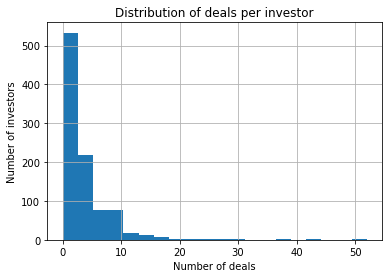

In [148]:
deals_per_investor = model_df.groupby('investor_uuid').count()
# deals_per_investor.reset_index(inplace=True,drop=True)
deals_per_investor.rename(columns = {'un':'number_of_deals'}, inplace=True)
deals_per_investor['number_of_deals'].plot(kind='hist', bins=20, range=[0,52], title='Distribution of deals per investor', grid=True)
plt.xlabel('Number of deals')
plt.ylabel('Number of investors')
print('Mean deals per investor:',deals_per_investor['number_of_deals'].mean())
print('Median deals per investor:', deals_per_investor['number_of_deals'].median())
#deals_per_investor.hist(column='Deal distribution of investors',bins=20, range=[0,52])

Percentage of investors with 20 tweets: 89.8840885142255


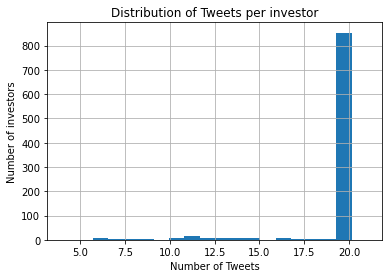

In [88]:
investor_tweet_count = ct_recept_all.groupby('un').count()
investor_tweet_count.rename(columns={'lang':'tweet_count'}, inplace=True)
investor_tweet_count.reset_index(inplace=True)
model_df['tweet_count'] = model_df.un.map(investor_tweet_count.set_index('un')['tweet_count'].to_dict())
model_df.groupby('un').first()['tweet_count'].plot(kind='hist', bins=20, range=[4,21], grid=True, title='Distribution of Tweets per investor')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of investors')
w20 = model_df[model_df['tweet_count']==20]['un'].nunique()
tot = model_df['un'].nunique()
print('Percentage of investors with 20 tweets:',(w20/tot)*100)
model_df.drop(columns='tweet_count', inplace=True)

Average number of characters per investor: 436.7755532139094


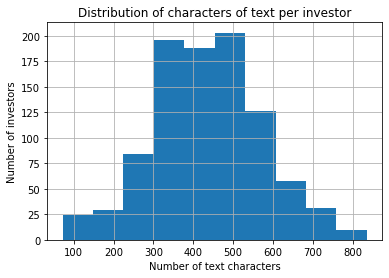

In [78]:
investor_word_count = ct_recept_all.groupby('un').agg({
    'word_count': 'sum'
})
investor_word_count.reset_index(inplace=True)
model_df['word_count'] = model_df.un.map(investor_word_count.set_index('un')['word_count'].to_dict())
model_df.groupby('un').first()['word_count'].plot(kind='hist', grid=True, title='Distribution of characters of text per investor')
plt.xlabel('Number of text characters')
plt.ylabel('Number of investors')
print('Average number of characters per investor:',model_df.groupby('un').first()['word_count'].mean())
model_df.drop(columns='word_count', inplace=True)

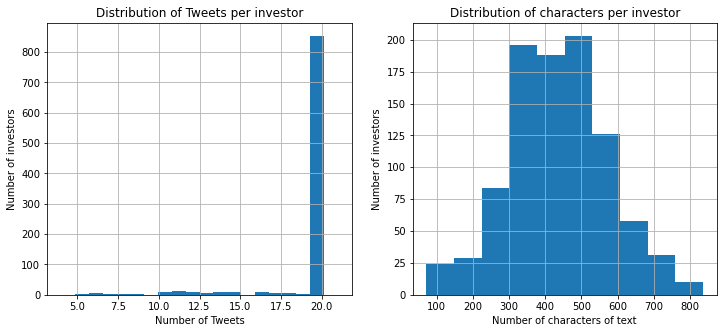

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2)

investor_tweet_count = ct_recept_all.groupby('un').count()
investor_tweet_count.rename(columns={'lang':'tweet_count'}, inplace=True)
investor_tweet_count.reset_index(inplace=True)
model_df['tweet_count'] = model_df.un.map(investor_tweet_count.set_index('un')['tweet_count'].to_dict())
inter = model_df.groupby('un').first()[['tweet_count']]

ax1.hist(inter, bins=20, range=[4,21])
ax1.set_title('Distribution of Tweets per investor')
ax1.set_xlabel('Number of Tweets')
ax1.set_ylabel('Number of investors')
ax1.grid(axis='both')
model_df.drop(columns='tweet_count', inplace=True)


investor_word_count = ct_recept_all.groupby('un').agg({
    'word_count': 'sum'
})
investor_word_count.reset_index(inplace=True)
model_df['word_count'] = model_df.un.map(investor_word_count.set_index('un')['word_count'].to_dict())

ax2.hist(model_df.groupby('un').first()['word_count'])
ax2.set_title('Distribution of characters per investor')
ax2.set_xlabel('Number of characters of text')
ax2.set_ylabel('Number of investors')
ax2.grid(axis='both')


model_df.drop(columns='word_count', inplace=True)

fig.set_size_inches(12, 5)

### Deal visualization 

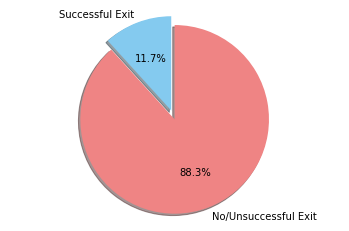

In [366]:
labels = 'Successful Exit', 'No/Unsuccessful Exit'
sizes = [len(model_df[model_df['suc_exit']==1]), len(model_df[model_df['suc_exit']==0])]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#add colors
colors = ['#84CAEF','#EF8484']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

suc_exit_sample = len(model_df[model_df['suc_exit']==1])/len(model_df)

In [85]:
industries = pd.read_excel('deal_industries.xlsx')
industries.drop(columns='Unnamed: 0', inplace=True)

In [86]:
industries.columns = industries.columns.str.capitalize()

In [87]:
industry_counts = industries.sum().to_frame()
industry_counts.reset_index(inplace=True)
industry_counts.columns = ['Industry', 'count']
industry_counts = industry_counts.sort_values(by=['count'])

In [88]:
industry_exits = industries.groupby('Suc_exit').sum()
industry_exits.reset_index(inplace=True)

In [89]:
unsuc_exits_ind = industry_exits[industry_exits['Suc_exit']==0].sum().to_frame()
unsuc_exits_ind.reset_index(inplace=True)
unsuc_exits_ind.columns = ['Industry', 'count_unsuc']
suc_exits_ind = industry_exits[industry_exits['Suc_exit']==1].sum().to_frame()
suc_exits_ind.reset_index(inplace=True)
suc_exits_ind.columns = ['Industry', 'count_suc']

In [90]:
#industry_counts['Unsuccessful exit'] = industry_counts.Industry.map(investors.set_index('uuid')['name'].to_dict())

In [91]:
# ax1 = industry_counts.plot.barh(x='Industry', y='count', figsize=(3,10),legend=False, title='Industry frequency of portfolio companies')
# ax1.invert_xaxis()
# ax1.set_xlabel('Count')

In [92]:
industry_counts['count_suc'] = industry_counts.Industry.map(suc_exits_ind.set_index('Industry')['count_suc'].to_dict())
industry_counts['count_unsuc'] = industry_counts.Industry.map(unsuc_exits_ind.set_index('Industry')['count_unsuc'].to_dict())
industry_counts['suc_pro'] = industry_counts['count_suc'] / industry_counts['count']
industry_counts = industry_counts[industry_counts['Industry'] != 'Suc_exit']
industry_counts.reset_index(inplace=True, drop=True)

In [93]:
# ax2 = industry_counts.sort_values(by=['suc_pro']).plot.barh(x='Industry', y='suc_pro', figsize=(3,10),legend=False, title='Rate of successful exit per industry')
# ax2.set_xlabel('Successful exit percentage')
# ax2.yaxis.set_label_position("right")
# ax2.yaxis.tick_right()
# ax2.set_ylabel('')

In [108]:
industry_counts.iloc[7,0] = 'Messaging and telecom'

In [241]:
industry_counts.sort_values(by=['count']).tail(n=15)

,Industry,count,count_suc,count_unsuc,suc_pro
32,Apps,295,44,251,0.149153
33,Artificial intelligence,298,17,281,0.057047
34,Health care,359,65,294,0.181058
35,Sales and marketing,418,46,372,0.110048
36,Other,491,48,443,0.097760
37,Financial services,498,51,447,0.102410
38,Media and entertainment,501,69,432,0.137725
39,Mobile,542,88,454,0.162362
40,Science and engineering,560,67,493,0.119643
41,Hardware,585,64,521,0.109402


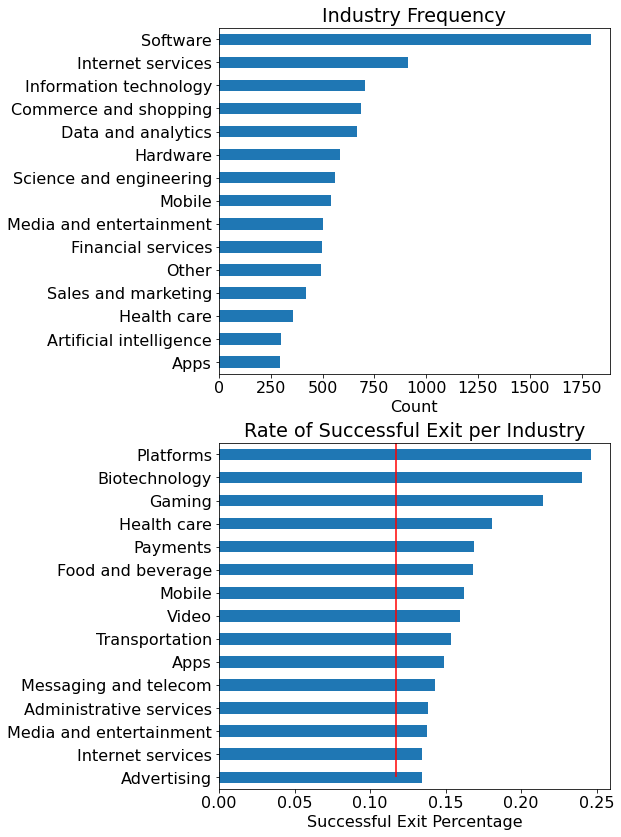

In [268]:
fig, ax = plt.subplots(2,1)
suc_exit_sample = model_df.suc_exit.sum()/len(model_df)

ax1 = industry_counts.sort_values(by=['count']).tail(n=15).plot.barh(x='Industry', y='count', figsize=(3,8),legend=False, title='Industry Frequency',ax=ax[0])
#ax1.invert_xaxis()
ax1.set_xlabel('Count')
ax1.set_ylabel('')


ax2 = industry_counts.sort_values(by=['suc_pro']).tail(n=15).plot.barh(x='Industry', y='suc_pro', figsize=(3,8),legend=False, title='Rate of Successful Exit per Industry',ax=ax[1])
ax2.set_xlabel('Successful Exit Percentage')
#ax2.invert_xaxis()
#ax2.yaxis.set_label_position("left")
#ax2.yaxis.tick_right()
ax2.vlines(x=suc_exit_sample, ymin=0, ymax=50, colors='r', label='Sample successful exit rate')
ax2.set_ylabel('')

fig.set_size_inches(7, 14)
#fig.show()

<AxesSubplot:>

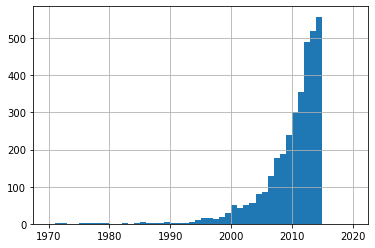

In [388]:
model_df.founded_on.hist(range=[1970,2020], bins=50)

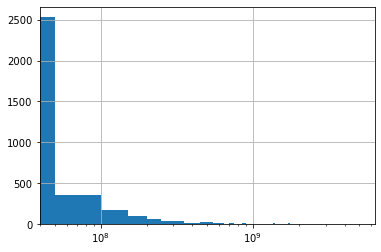

In [395]:
model_df.raised_amount_usd.hist(bins=100, range=[0,5000000000])
plt.xscale('log')

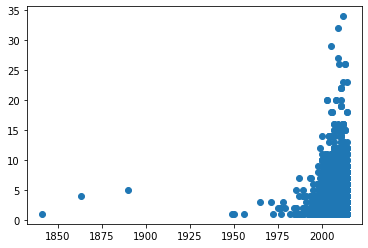

In [413]:
plt.scatter(x=model_df.founded_on, y=model_df.org_num_funding_rounds)

Text(0, 0.5, 'Successful exit')

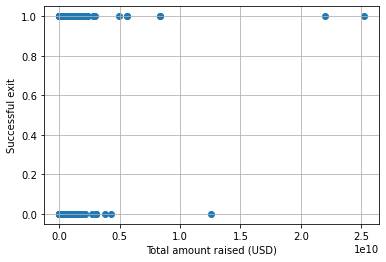

In [460]:
plt.scatter(x=model_df.raised_amount_usd, y=model_df.suc_exit)
plt.grid()
plt.xlabel('Total amount raised (USD)')
plt.ylabel('Successful exit')

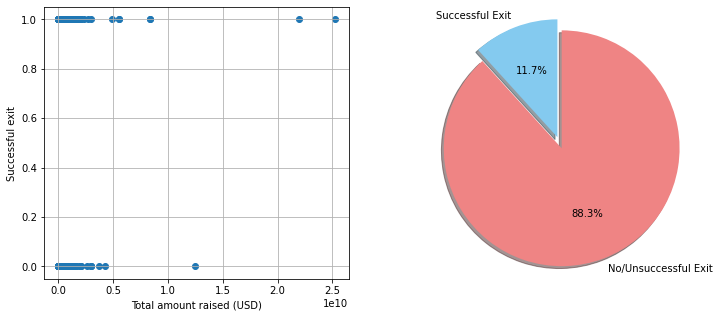

In [467]:
fig, (ax1, ax2) = plt.subplots(1, 2)

labels = 'Successful Exit', 'No/Unsuccessful Exit'
sizes = [len(model_df[model_df['suc_exit']==1]), len(model_df[model_df['suc_exit']==0])]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#add colors
colors = ['#84CAEF','#EF8484']

ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()


ax1.scatter(x=model_df.raised_amount_usd, y=model_df.suc_exit)
ax1.grid()
ax1.set_xlabel('Total amount raised (USD)')
ax1.set_ylabel('Successful exit')

fig.set_size_inches(12, 5)

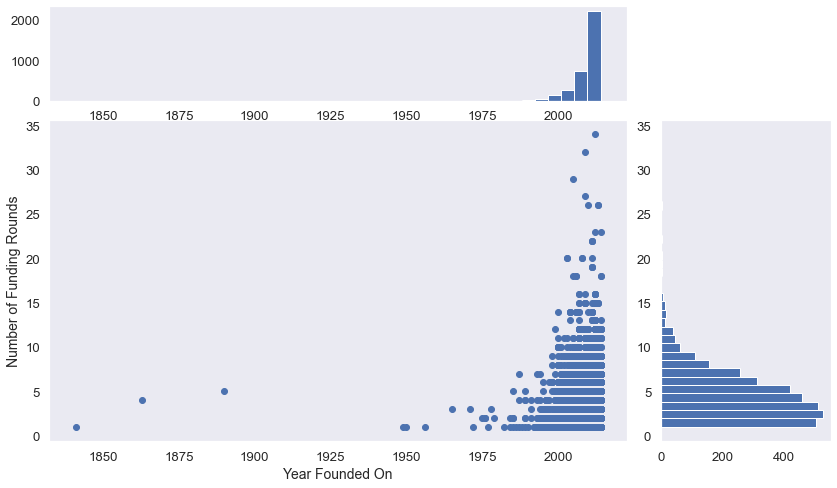

In [304]:
from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(4, 4)

ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(model_df.founded_on, model_df.org_num_funding_rounds)
ax_scatter.grid()
ax_scatter.set_xlabel('Year Founded On', fontsize=14)
ax_scatter.set_ylabel('Number of Funding Rounds', fontsize=14)


ax_hist_x.hist(model_df.founded_on, bins=40)
ax_hist_x.grid()

ax_hist_y.hist(model_df.org_num_funding_rounds, orientation = 'horizontal', bins=35)
ax_hist_y.grid()

fig.set_size_inches(14, 8)
#fig.suptitle('tet', fontsize=16)

plt.show()

In [346]:
model_df.org_num_funding_rounds.median()

4.0

### Human capital visualizations

In [863]:
!conda install -c conda-forge/label/gcc7 missingno -y

Solving environment: done

## Package Plan ##

  environment location: /Users/jacob/opt/anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:          10 KB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0



missingno-0.4.1      | 10 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2308]:
HC_model = pd.read_csv('model_df_HC_25_Nov.csv')
HC_model.drop(columns='Unnamed: 0',inplace=True)

<AxesSubplot:>

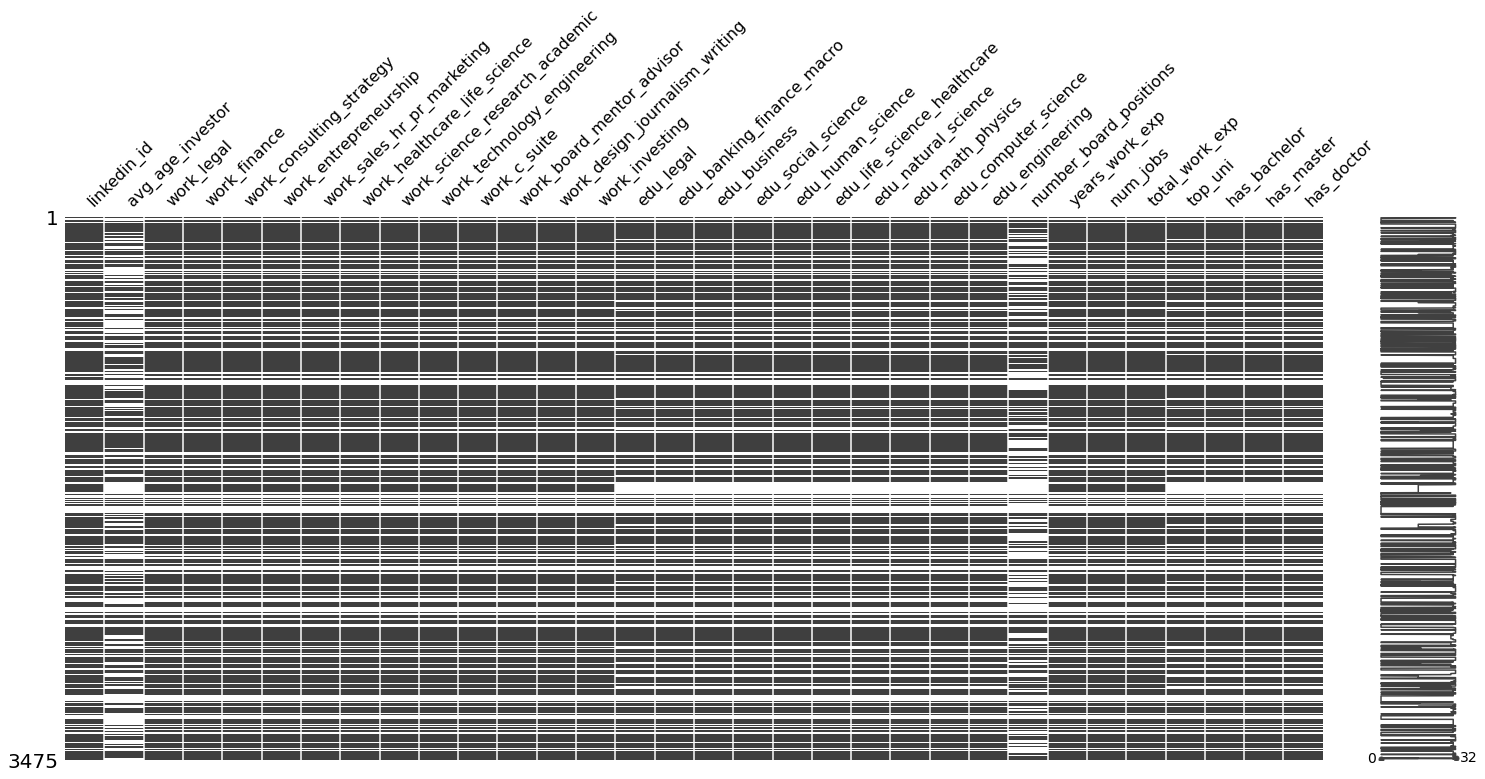

In [2441]:
import missingno as msno
msno.matrix(HC_model[['linkedin_id', 'avg_age_investor', 'work_legal', 'work_finance',
       'work_consulting_strategy', 'work_entrepreneurship',
       'work_sales_hr_pr_marketing', 'work_healthcare_life_science',
       'work_science_research_academic', 'work_technology_engineering',
       'work_c_suite', 'work_board_mentor_advisor',
       'work_design_journalism_writing', 'work_investing', 'edu_legal',
       'edu_banking_finance_macro', 'edu_business', 'edu_social_science',
       'edu_human_science', 'edu_life_science_healthcare',
       'edu_natural_science', 'edu_math_physics', 'edu_computer_science',
       'edu_engineering', 'number_board_positions', 'years_work_exp',
       'num_jobs', 'total_work_exp', 'top_uni', 'has_bachelor', 'has_master',
       'has_doctor']])

In [2690]:
# missing_profiles = pd.DataFrame({'uuid':model_df[model_df.linkedin_id.isnull()]['investor_uuid'].unique()})
# missing_profiles.to_csv('missing_li.csv')
# missing_profiles['name'] = missing_profiles.uuid.map(investors.set_index('uuid')['name'].to_dict())
# # missing_profiles['linkedin_url'] = missing_profiles.uuid.map(investors.set_index('uuid')['linkedin_url'].to_dict())

# missing_profiles['investor_types'] = missing_profiles.uuid.map(investors.set_index('uuid')['investor_types'].to_dict())
# missing_profiles['investor_org_name'] = missing_profiles.uuid.map(model_df.set_index('investor_uuid')['investor_org_name'].to_dict())
# missing_profiles['investor_org_uuid'] = missing_profiles.uuid.map(model_df.set_index('investor_uuid')['investor_org_uuid'].to_dict())
# missing_profiles['investor_org_type'] = missing_profiles.uuid.map(model_df.set_index('investor_uuid')['investor_org_type'].to_dict())
# missing_profiles['investor_org_primary_role'] = missing_profiles.uuid.map(model_df.set_index('investor_uuid')['investor_org_primary_role'].to_dict())

# missing_profiles[missing_profiles['investor_types']!='investment_partner'].to_csv('missing_profiles_not_investment_partner.csv')
# missing_profiles[missing_profiles['investor_types']=='investment_partner'].to_csv('missing_profiles_investment_partner.csv')

In [170]:
# model_hc[['work_legal',
#        'work_finance', 'work_consulting_strategy', 'work_entrepreneurship',
#        'work_sales_hr_pr_marketing', 'work_healthcare_life_science',
#        'work_science_research_academic', 'work_technology_engineering',
#        'work_c_suite', 'work_board_mentor_advisor',
#        'work_design_journalism_writing', 'work_investing', 'edu_legal',
#        'edu_banking_finance_macro', 'edu_business', 'edu_social_science',
#        'edu_human_science', 'edu_life_science_healthcare',
#        'edu_natural_science', 'edu_math_physics', 'edu_computer_science',
#        'edu_engineering']].corr()

<AxesSubplot:>

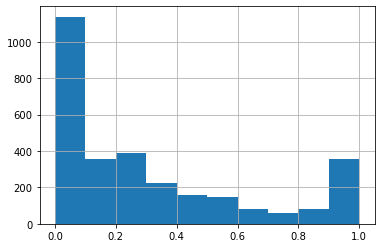

In [191]:
model_hc['work_finance'].hist()

In [251]:
plt.rcParams.update({'font.size': 16})

# cols = ['work_legal',
#        'work_finance', 'work_consulting_strategy', 'work_entrepreneurship',
#        'work_sales_hr_pr_marketing', 'work_healthcare_life_science',
#        'work_science_research_academic', 'work_technology_engineering',
#        'work_c_suite', 'work_board_mentor_advisor',
#        'work_design_journalism_writing', 'work_investing', 'edu_legal',
#        'edu_banking_finance_macro', 'edu_business', 'edu_social_science',
#        'edu_human_science', 'edu_life_science_healthcare',
#        'edu_natural_science', 'edu_math_physics', 'edu_computer_science',
#        'edu_engineering']
# hc_measure = []
# suc_exit_cor = []
# for col in cols:
#     hc_measure.append(col)
#     suc_exit_cor.append(model_hc[[col, 'suc_exit']].corr().iloc[0,1])

# hc_corr = pd.DataFrame({'hc_measure': hc_measure,
#                        'suc_exit_corr': suc_exit_cor})

# hc_corr.sort_values(by=['suc_exit_corr'], inplace=True, ascending=False)

# hc_corr.plot.bar(x='hc_measure', y='suc_exit_corr', figsize=(10,4),legend=False, title='Correlation betweeen human capital measures and successful exit', xlabel='Human Capital Measure', ylabel="Successful Exit Correlation", grid=True)

(0.0, 23.0, 23.0, 0.0)

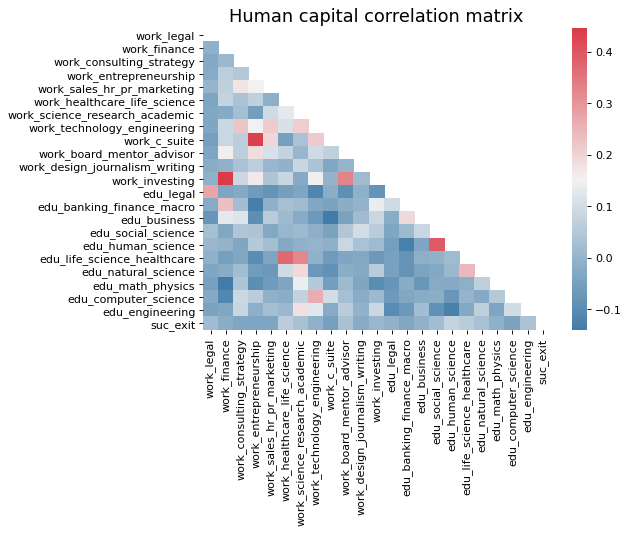

In [339]:
from matplotlib.pyplot import figure

#compute correlation
corr = model_hc[['work_legal',
       'work_finance', 'work_consulting_strategy', 'work_entrepreneurship',
       'work_sales_hr_pr_marketing', 'work_healthcare_life_science',
       'work_science_research_academic', 'work_technology_engineering',
       'work_c_suite', 'work_board_mentor_advisor',
       'work_design_journalism_writing', 'work_investing', 'edu_legal',
       'edu_banking_finance_macro', 'edu_business', 'edu_social_science',
       'edu_human_science', 'edu_life_science_healthcare',
       'edu_natural_science', 'edu_math_physics', 'edu_computer_science',
       'edu_engineering', 'suc_exit']].corr()

#create mask to only show one half of matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

#change color map
cmap = sns.diverging_palette(240, 10, n=100, as_cmap=True)

#specify figsize and setup
figure(figsize=(7, 5), dpi=80)
ax=plt.axes()

#plot
sns.heatmap(corr, ax=ax, mask=mask, cmap=cmap)
ax.set_title("Human capital correlation matrix", fontsize=16)
ax.axis('auto')
# ax.set(xticks=np.arange(len(labels)), xticklabels=labels,
#        yticks=np.arange(len(labels)), yticklabels=labels)

In [343]:
# model_hc[['work_legal',
#        'work_finance', 'work_consulting_strategy', 'work_entrepreneurship',
#        'work_sales_hr_pr_marketing', 'work_healthcare_life_science',
#        'work_science_research_academic', 'work_technology_engineering',
#        'work_c_suite', 'work_board_mentor_advisor',
#        'work_design_journalism_writing', 'work_investing', 'edu_legal',
#        'edu_banking_finance_macro', 'edu_business', 'edu_social_science',
#        'edu_human_science', 'edu_life_science_healthcare',
#        'edu_natural_science', 'edu_math_physics', 'edu_computer_science',
#        'edu_engineering', 'suc_exit']].corr()

### Personality visualizations

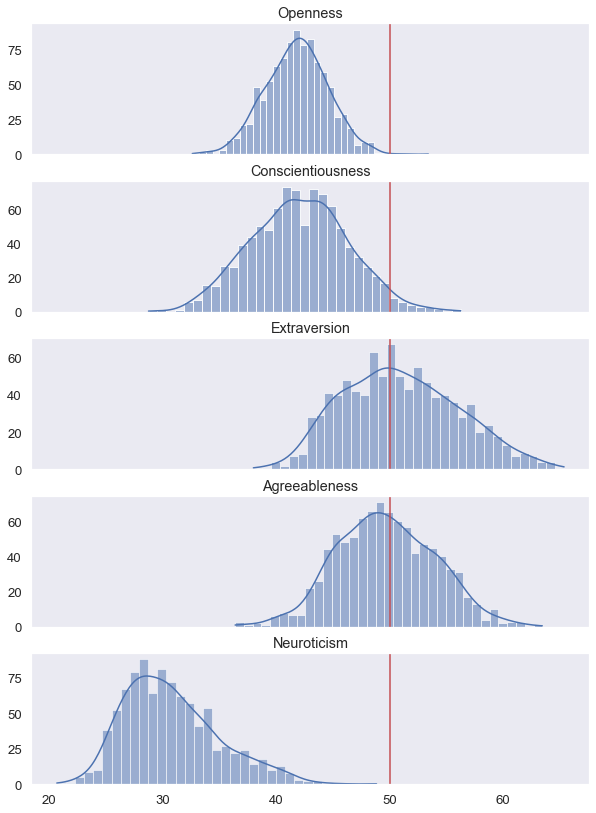

In [322]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True)


openness = model_bf[['investor_uuid','openness']].groupby('investor_uuid').first()
conscientiousness = model_bf[['investor_uuid','conscientiousness']].groupby('investor_uuid').first()
extraversion = model_bf[['investor_uuid','extraversion', ]].groupby('investor_uuid').first()
agreeableness = model_bf[['investor_uuid','agreeableness']].groupby('investor_uuid').first()
neuroticism = model_bf[['investor_uuid','neuroticism']].groupby('investor_uuid').first()

sns.histplot(openness,x='openness', bins=35, kde=True, ax=ax1)
ax1.axvline(50, color='r')
ax1.set_title('Openness')
ax1.grid()
ax1.set_xlabel('')
ax1.set_ylabel('')

sns.histplot(conscientiousness,x='conscientiousness', bins=35, kde=True, ax=ax2)
ax2.axvline(50, color='r')
ax2.set_title('Conscientiousness')
ax2.grid()
ax2.set_xlabel('')
ax2.set_ylabel('')

sns.histplot(extraversion,x='extraversion', bins=35, kde=True, ax=ax3)
ax3.axvline(50, color='r')
ax3.set_title('Extraversion')
ax3.grid()
ax3.set_xlabel('')
ax3.set_ylabel('')

sns.histplot(agreeableness,x='agreeableness', bins=35, kde=True, ax=ax4)
ax4.axvline(50, color='r')
ax4.set_title('Agreeableness')
ax4.grid()
ax4.set_xlabel('')
ax4.set_ylabel('')

sns.histplot(neuroticism,x='neuroticism', bins=35, kde=True, ax=ax5)
ax5.axvline(50, color='r')
ax5.set_title('Neuroticism')
ax5.grid()
ax5.set_xlabel('')
ax5.set_ylabel('')

fig.set_size_inches(10, 14)
# fig.text(0.5,0.005, "Receptiviti personality scores", ha="center", va="center", fontsize=12)

In [328]:
print('mean aggreableness', model_bf['agreeableness'].mean())

mean aggreableness 49.714208888413815


(0.0, 36.0, 36.0, 0.0)

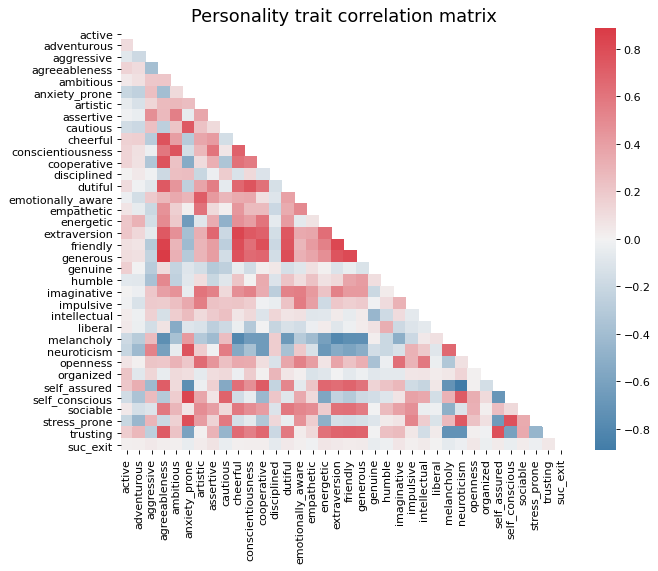

In [337]:
#compute correlation
corr = model_bf_facets[['active','adventurous', 'aggressive', 
                         'agreeableness', 'ambitious','anxiety_prone',
                         'artistic', 'assertive', 'cautious', 'cheerful',
                         'conscientiousness', 'cooperative', 'disciplined',
                         'dutiful','emotionally_aware', 'empathetic', 'energetic',
                         'extraversion','friendly', 'generous', 'genuine',
                         'humble', 'imaginative', 'impulsive','intellectual',
                         'liberal', 'melancholy', 'neuroticism', 'openness',
                         'organized', 'self_assured', 'self_conscious',
                         'sociable','stress_prone', 'trusting', 'suc_exit']].corr()

#create mask to only show one half of matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

#change color map
cmap = sns.diverging_palette(240, 10, n=100, as_cmap=True)

#specify figsize and setup
figure(figsize=(9, 7), dpi=80)
ax=plt.axes()

#plot
sns.heatmap(corr, ax=ax, mask=mask, cmap=cmap)
ax.set_title("Personality trait correlation matrix", fontsize=16)
ax.axis('auto')
# ax.set(xticks=np.arange(len(labels)), xticklabels=labels,
#        yticks=np.arange(len(labels)), yticklabels=labels)

In [342]:
# model_bf_facets[['active','adventurous', 'aggressive', 
#                          'agreeableness', 'ambitious','anxiety_prone',
#                          'artistic', 'assertive', 'cautious', 'cheerful',
#                          'conscientiousness', 'cooperative', 'disciplined',
#                          'dutiful','emotionally_aware', 'empathetic', 'energetic',
#                          'extraversion','friendly', 'generous', 'genuine',
#                          'humble', 'imaginative', 'impulsive','intellectual',
#                          'liberal', 'melancholy', 'neuroticism', 'openness',
#                          'organized', 'self_assured', 'self_conscious',
#                          'sociable','stress_prone', 'trusting', 'suc_exit']].corr()

<AxesSubplot:title={'center':'Correlation betweeen personality measures and successful exit'}, xlabel='Personality traits', ylabel='Successful exit correlation'>

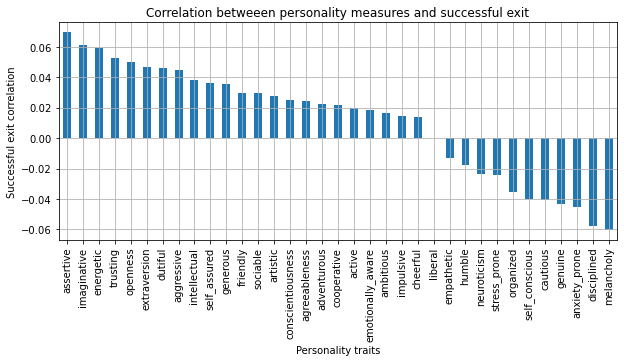

In [322]:
cols = ['active','adventurous', 'aggressive', 
                         'agreeableness', 'ambitious','anxiety_prone',
                         'artistic', 'assertive', 'cautious', 'cheerful',
                         'conscientiousness', 'cooperative', 'disciplined',
                         'dutiful','emotionally_aware', 'empathetic', 'energetic',
                         'extraversion','friendly', 'generous', 'genuine',
                         'humble', 'imaginative', 'impulsive','intellectual',
                         'liberal', 'melancholy', 'neuroticism', 'openness',
                         'organized', 'self_assured', 'self_conscious',
                         'sociable','stress_prone', 'trusting']
personality_trait = []
suc_exit_cor = []
for col in cols:
    personality_trait.append(col)
    suc_exit_cor.append(model_bf_facets[[col, 'suc_exit']].corr().iloc[0,1])

pers_corr = pd.DataFrame({'personality_trait': personality_trait,
                       'suc_exit_corr': suc_exit_cor})

pers_corr.sort_values(by=['suc_exit_corr'], inplace=True, ascending=False)

pers_corr.plot.bar(x='personality_trait', y='suc_exit_corr', figsize=(10,4),legend=False, title='Correlation betweeen personality measures and successful exit', xlabel='Personality traits', ylabel="Successful exit correlation", grid=True)

In [341]:
print('min corr:',pers_corr.suc_exit_corr.min())
print('max corr:',pers_corr.suc_exit_corr.max())

min corr: -0.06029173002340871
max corr: 0.0694806569026051


In [320]:
# !pip install --upgrade matplotlib

In [319]:
# from matplotlib.pyplot import figure

# #compute correlation
# corr = ct_recept_all_mean.drop(columns='word_count').corr()

# #create mask to only show one half of matrix
# mask = np.triu(np.ones_like(corr, dtype=bool))

# #change color map
# cmap = sns.diverging_palette(240, 10, n=100, as_cmap=True)

# #specify figsize and setup
# figure(figsize=(12, 12), dpi=80)
# ax=plt.axes()

# #plot
# sns.heatmap(ct_recept_all_mean.drop(columns='word_count').corr(), ax=ax, mask=mask, cmap=cmap)
# ax.set_title("Correlation matrix", fontsize=16)
# ax.axis('auto')
# # ax.set(xticks=np.arange(len(labels)), xticklabels=labels,
# #        yticks=np.arange(len(labels)), yticklabels=labels)